## Mathematics and Statistics for Analytics - Homework Assignment 3

Authors: Raffi Sahakyan, Pansull Bhatt, Bei Yei
<br>
Date: 02 Dec, 2019

## Homework 3 - Part 1
## Decision Tree and Random forest

In this homework, you will perform classification on the provided datasets using Decision Tree and Random Forest algorithms. 

The first dataset you will be working with contains 2 features. The second dataset contains 50 features. Both of them have a target label which can be 0 or 1.

You will go step by step with the first dataset. <br>
1 - Use a Decision Tree Classifier and observe the model performance.<br>
2 - Use a Random Forest Classifier and observe the model performance.<br>
3 - Use Grid Search to choose the optimal values for hyperparameters and observe the performance of the best model.


For the second dataset, you are required to generate an optimized Random Forest model using what you have learned in the steps mentioned above.

Dataset 1:
train_2features.csv and test_2features.csv are the training set and testing set respecitvely.


Dataset 2:
train_50features.csv and test_50features.csv are the training set and testing set respecitvely.


To obtain a deterministic behavior, keep the random_state in all algorithms fixed to the value given. 


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = 'gdrive/My Drive/HW3/'
import os
os.chdir(root_path)
print(os.listdir())

['test_50features.csv', 'utils.py', 'test_2features.csv', 'predictions.csv', 'train_50features.csv', 'train_2features.csv', 'Homework 3 - Part 1-Copy1.ipynb', '__pycache__']


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import visualize_2d_data

# Dataset 1

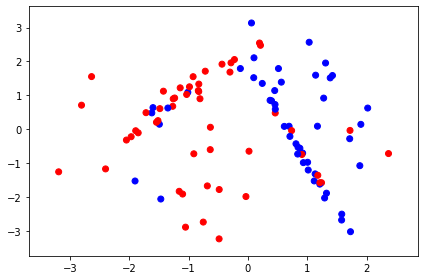

In [0]:
train_df = pd.read_csv("train_2features.csv")
f, ax = visualize_2d_data(train_df)

In [0]:
train_df.head()

,x1,x2,y
0,0.455178,0.727672,1
1,-0.303342,1.684185,0
2,-1.100127,-1.914980,0
3,1.129869,-1.319774,1
4,0.396403,0.836826,1


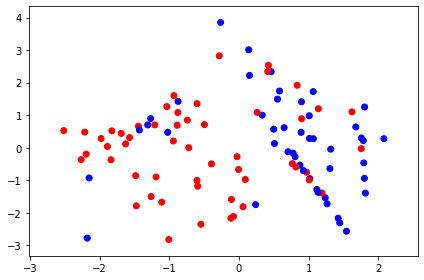

In [0]:
test_df = pd.read_csv("test_2features.csv")
f, ax = visualize_2d_data(test_df)

In [0]:
test_df.head()

,x1,x2,y
0,-1.260875,-1.496315,0
1,1.804029,1.253803,1
2,-1.627030,0.118947,0
3,-1.888437,0.040332,0
4,1.140222,1.199631,0


**Q. From the above visualizations, what can you tell about the need for a linear/non-linear model for classification?**

_Answer_ - If we solely base our decision on the above plots, linear classification models may be used, however they will not provide the desired accuracy, in terms of recall/precision. Therefore, non-linear decision boundaries are required, which would be derived from non-linear classifiaction models. Yet, before answering the question, we have to identify the business objective, target accuracy, position on interpretability vs. accuracy tradeoff, etc. While non/linear models. 

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [0]:
X_train, y_train = train_df.drop('y', axis=1), np.ravel(train_df['y'])
X_test, y_test = test_df.drop('y', axis=1), np.ravel(test_df['y'])

In [0]:
### Fit the classifier on the training data
clf = DecisionTreeClassifier(random_state=26)

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=26, splitter='best')

In [0]:
### Make predictions on the training data
y_hat_train = clf.predict(X_train)


Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [0]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

def fetch_scores(y: pd.DataFrame, y_hat: pd.DataFrame):
    """
    Function to calculate the precision, accuracy and recall scores
    """
    print("Accuracy Score: ", accuracy_score(y, y_hat))
    print("Precision Score: ", precision_score(y, y_hat))
    print("Recall Score: ", recall_score(y, y_hat))    

fetch_scores(y_train, y_hat_train)

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0


In [0]:
### Make predictions on the testing data
y_hat_test = clf.predict(X_test)


Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [0]:
# Fetch the accuracy, prediction and recall scores
fetch_scores(y_test, y_hat_test)

Accuracy Score:  0.69
Precision Score:  0.6818181818181818
Recall Score:  0.6382978723404256


In [0]:
# Counting the number of outputs to identify their distribution
print(sum(1 for i in y_train if i == 1) / len(y_train))
print(sum(1 for i in y_test if i == 1) / len(y_test))

0.49
0.47


Q. Plot ROC curve and obtain AUC for test predictions

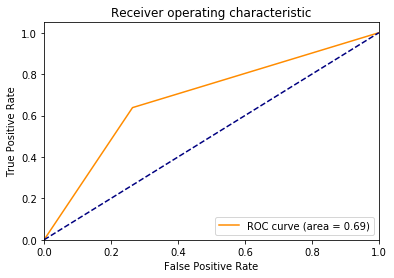

In [0]:
from sklearn.metrics import roc_curve, auc
# Plot the ROC curve by giving appropriate names for title and axes. 

%matplotlib inline

def plot_roc_curve(y: pd.DataFrame, y_hat: pd.DataFrame, title="Receiver operating characteristic"):
    """
    Function to plot the roc curve
    """
    fpr, tpr, thresholds = roc_curve(y, y_hat)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (area = {auc(fpr, tpr):>.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

y_hat_prob = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_hat_prob)

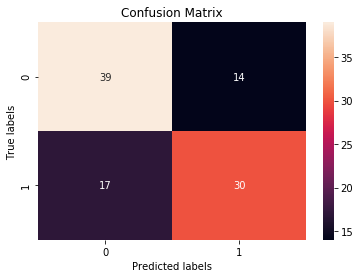

In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_cv, y_pred):
    """
    Plot confusion matrix
    """
    cm = confusion_matrix(y_cv, y_pred) #confusion matrix

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='g')  #heatmap, fmt='g' converts scientific to float
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

    #last version of seaborn is messing the heatmap when working with matplotlib
    #so we have to adjust these lines
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

plot_confusion_matrix(y_test, y_hat_test)

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
X_test.tail()

,x1,x2
95,1.801460,-0.937715
96,-0.887340,0.693588
97,0.703942,-0.121592
98,-0.026801,-0.271846
99,-1.035082,1.264804


In [0]:
scores = cross_val_score(clf, pd.concat([X_train, X_test]), np.concatenate([y_train, y_test]), cv=5)
print(scores)
print(scores.std())

[0.65853659 0.7        0.7        0.725      0.76923077]
0.036277363242611826


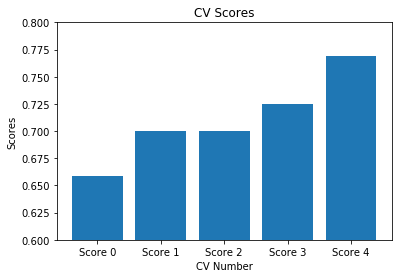

In [0]:
plt.bar([f"Score {i}" for i in range(len(scores))], scores)
plt.xlabel('CV Number')
plt.ylabel('Scores')
plt.ylim([0.6, 0.8])
plt.title("CV Scores")
plt.show()

**Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance.**

In terms of bias, the model is performing excellent on the training set(providing high accuracy), while its underperforming on the test set. This is further confirmed by the considerable variance in the cross validation scores, which is a red flag pointing to overfitting. Thus, we can deduce that the model is overfitted i.e. the model has high variance. This is to be expected as most decision trees are prone to overfitting.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
### Fit the classifier on the training data
clf = RandomForestClassifier(random_state=26)

clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=26, verbose=0,
                       warm_start=False)

In [0]:
### Make predictions on the training data
y_hat_train = clf.predict(X_train)

Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [0]:
fetch_scores(y_train, y_hat_train)

Accuracy Score:  0.99
Precision Score:  1.0
Recall Score:  0.9795918367346939


In [0]:
### Make predictions on the testing data
y_hat_test = clf.predict(X_test)

Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [0]:
fetch_scores(y_test, y_hat_test)

Accuracy Score:  0.72
Precision Score:  0.7021276595744681
Recall Score:  0.7021276595744681


Q. Plot ROC curve and obtain AUC for the test predictions

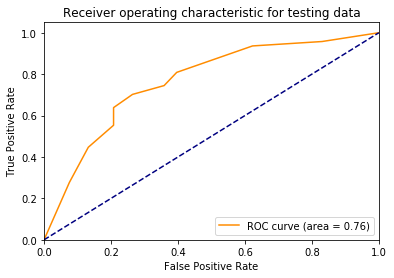

In [0]:
# Plot the ROC curve by giving appropriate names for title and axes. 
y_hat_prob = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_hat_prob, "Receiver operating characteristic for testing data")

In [0]:
scores = cross_val_score(clf, pd.concat([X_train, X_test]), np.concatenate([y_train, y_test]), cv=5)
print(scores)
print(scores.std())

[0.65853659 0.775      0.725      0.725      0.74358974]
0.03811052294733671


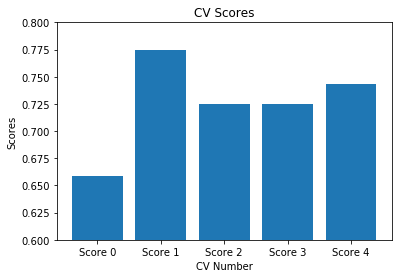

In [0]:
plt.bar([f"Score {i}" for i in range(len(scores))], scores)
plt.xlabel('CV Number')
plt.ylabel('Scores')
plt.ylim([0.6, 0.8])
plt.title("CV Scores")
plt.show()

**Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated.** 

In terms of bias, we can observe that Random Forest on accuracy has reduced slightly, while it increased considerably on test set. With regards to variance the difference between the model's performance on the train set and test set decreased, thus it is overfitting less. In other words, the model variance has been reduced.  
  
  
The performance improved in Random Forests as it is an ensemble method which takes a combination of several decision trees. Random forest also allows the model to be more generalized as it considers different features for predicting the output. Due to this, our performance has also increased as the model was able to predict more accurately on the test data.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn's doc to understand what the parameters depict

param_grid = {
    'max_depth': [i for i in range(1, 8)],
    'max_features': [1, 2], # Since we only have 2 features at max for the training data
    'min_samples_leaf': [i for i in range(2, 11)],
    'min_samples_split': [i for i in range(2, 15, 2)],
    'n_estimators': [i for i in range(10, 301, 40)]
}

In [0]:
rf = RandomForestClassifier(random_state=26)

In [0]:
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
### Fit the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 7056 candidates, totalling 21168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 6841 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 7934 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 9109 tasks      | 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=26,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

Q. Display the parameters of the best model.

In [0]:
### WRITE CODE HERE ###
grid_search.best_params_

{'max_depth': 4,
 'max_features': 1,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

Accuracy Score:  0.8
Precision Score:  0.7647058823529411
Recall Score:  0.8297872340425532


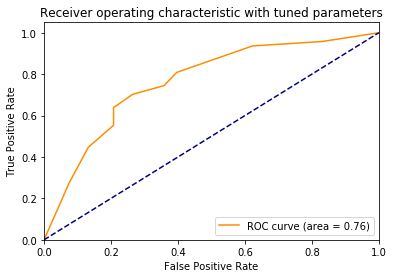

In [0]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the testing set and display accuracy, precision and recall. Plot ROC curve and print AUC.

# Initializing the classifier with the tuned parameters
rf = RandomForestClassifier(random_state=26, **grid_search.best_params_)
# Fit the model with the data
rf.fit(X_train, y_train)
# Predict the values
y_hat_test = rf.predict(X_test)

# Fetch the precision, accuracy and recall scores for the testing data
fetch_scores(y_test, y_hat_test)

# Plotting the values on a ROC curve
y_hat_prob = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_hat_prob, "Receiver operating characteristic with tuned parameters")

**Q. How did performing Grid Search impact the performance of the model? Were you able to optimize the hyperparameters?**

When we performed Grid Search, our model performed better as it selected the best hyperparameters (for this dataset and for the given range of hyperparameters) to train the data and when we used the tuned model our scores were much better. This is done by reducing the gini impurity than the previous values. Since we are able to reduce that, we are able to classify better and thus increase our f1 score.

# Dataset 2

Given this procedure, you are to optimize a random forest classifier for a dataset with 50 features. Training data are provided, but testing data does not include the labels. It is up to you to use the training data to optimize generalization performance to the test data. You will submit a csv file with your predictions. It should contain one column and the column should be named "y".


In [0]:
train_df = pd.read_csv("train_50features.csv")
test_data = pd.read_csv("test_50features.csv")

In [0]:
##########################################
### Construct your final random forest model and optimize the hyperparameters using Grid Search ###

# Data Preprocessing and preparation
X_train, y_train = train_df.drop('y', axis=1), np.ravel(train_df['y'])

# Selecting parameters for identifying the most optimal hyperparameters
param_grid = {
    'max_depth': [i for i in range(1, 11)],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [i for i in range(2, 11)],
    'min_samples_split': [2, 3, 4] + [i for i in range(5, 50, 5)],
    'n_estimators': [i for i in range(5, 51, 5)],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=26)

grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

rf = RandomForestClassifier(random_state=26, **grid_search.best_params_)
rf.fit(X_train, y_train)

predicted_df = pd.DataFrame({'y': rf.predict(test_data)})
predicted_df.to_csv("predictions.csv", index=False)


Fitting 3 folds for each of 43200 candidates, totalling 129600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 1996 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2886 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3940 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 5154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 6532 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 8070 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 9772 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 11634 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 13660 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 15846 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 18196 tasks   

{'class_weight': None, 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 40, 'n_estimators': 20}


**What can you tell about the range of values to be considered for each of the parameters mentioned above? Explain the reason for choosing the ranges mentioned in your solution.  Also, how does each of these parameters affect overfitting in the model?**

**Parameter tuning**
1. n_estimators: This is the number of trees which the random forest can use. When we use these values we can add it to a high range but after a set of operations the f-1 score would stop increasing. Therefore, we want to make sure that we don't take that high of a value as it would just add to the computation cost and model complexity. The higher the number of trees the more prone it might be to overfitting assuming that the features are not assisting in reducing overfitting.

2. max_depth: The max depth is the maximum height of the tree can grow. The range here has been selected from 1 to 10 as we don't need the tree to go beyond a limit of the log(100-the number of observations) to the base 2 [~7 and taking a buffer of 3 for safety]. The higher the max_depth the more prone it is towards overfitting the data, as it might work well in classifying the training data but it will not generalize to other datasets.

3. max_features: This is the maximum number of features that can be selected by a tree to make a decision. Since we have multiple separate decision trees we want to make sure that we don't take more than the square root of the number of independent variables, as this would allow us to reduce overfitting. When we use max_features, we can think about overfitting the data with less features but this varies depending on our data.

4. min_samples_leaf: This is the minimum number of sample required to be at the leaf node. We know that our model should take atleast 2 values[so that the tree doesn't end up with 100 leaves for 100 observations] and assume the maximum till 10. If we take a higher value than 10, the value might start underfitting the model as it will not allow our model to split too much.

5. min_samples_split: This is the minimum number of samples to split required to split a node. Since we want to make sure that the splitting happens, we take a range from 5 to 50. We want to make sure that we allow a split even if there is a 50-50 split before. The distribution of data suggests that there are 52 - 1 values and 48 - 0 values. The higher the min_samples_split value, the more prone our model is to underfitting, as it would not allow us to fit any further. This is one more reason why we don't exceed our range to be more than 50.

6. class_weight: This allows us to associate a weight to the trees. There are only 2 parameters which we are using here, "balanced" which identifies y and adjusts the weights, or "None" which doesn't add any weight. Although, a balanced weight might result in overfitting, it highly depends on our dataset.